In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [90]:
# Import data
df = pd.read_csv(os.getcwd() + '/medical_examination.csv', index_col='id')

In [91]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [92]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [93]:
# Add 'BMI' column 
# dividing their weight in kilograms by the square of their height in meters
df['BMI'] = df['weight'] / ((df['height'] / 100).pow(2))

In [94]:
print(df[df['BMI'] > 25])

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
1      20228       1     156    85.0    140     90            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
8      21914       1     151    67.0    120     80            2     2      0   
9      22113       1     157    93.0    130     80            3     1      0   
12     22584       2     178    95.0    130     90            3     3      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
99992  21074       1     165    80.0    150     80            1     1      0   
99993  19240       2     168    76.0    120     80            1     1      1   
99995  22601       1     158   126.0    140     90            2     2      0   
99996  19066       2     183   105.0    180     90            3     1      0   
99998  22431       1     163    72.0    

In [95]:
# Add 'overweight' column
df['overweight'] = df['BMI'].apply(lambda x: 1 if x > 25 else 0)


In [96]:
# check if data apply
df['overweight'].value_counts()

1    43546
0    26454
Name: overweight, dtype: int64

In [97]:
df[['cholesterol', 'gluc']]

,cholesterol,gluc
id,,
0,1,1
1,3,1
2,3,1
3,1,1
4,1,1
...,...,...
99993,1,1
99995,2,2
99996,3,1


In [98]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['gluc'] = df['gluc'].apply(lambda x : 0 if x ==1 else 1)
df['cholesterol'] = df['cholesterol'].apply(lambda x : 0 if x ==1 else 1)


In [133]:
df[['cholesterol', 'gluc']]

,cholesterol,gluc
id,,
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
...,...,...
99993,0,0
99995,1,1
99996,1,0


In [145]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.

    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio','variable', 'value'], as_index = False).count()

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(
                x = 'variable',
                y = 'total',
                hue="value", 
                kind="bar",
                col = 'cardio',
                data = df_cat
            )

    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig



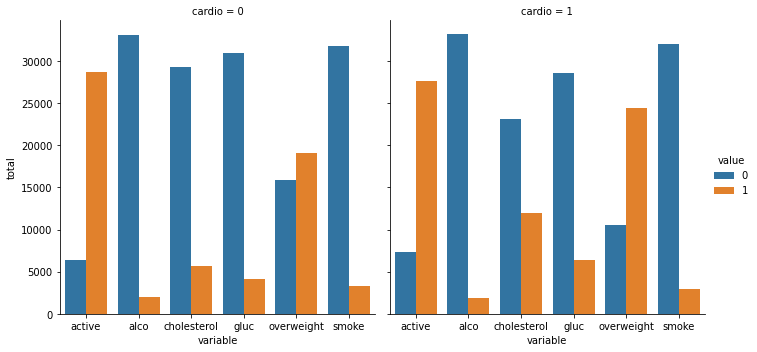

In [146]:
draw_cat_plot()

In [161]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) 
        & (df['height'] >= (df['height'].quantile(0.025))) 
        & (df['height'] <= (df['height'].quantile(0.975)))
        & (df['weight'] >= (df['weight'].quantile(0.025)))
        & (df['weight'] <= (df['weight'].quantile(0.975)))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(corr)

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(9,9))

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr, linewidths=1, mask=mask, vmax=.3, center=0.09, square=True,  annot=True,)


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

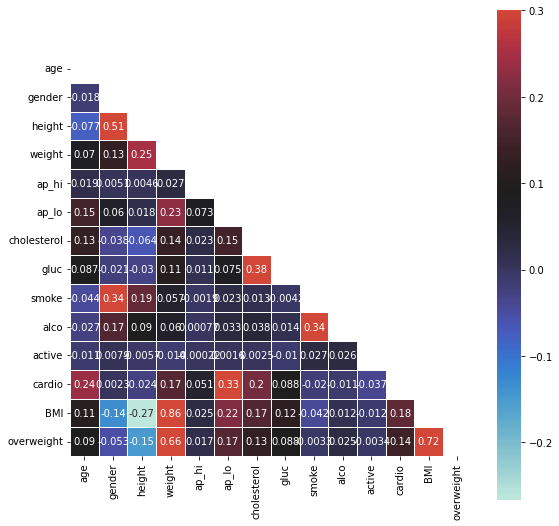

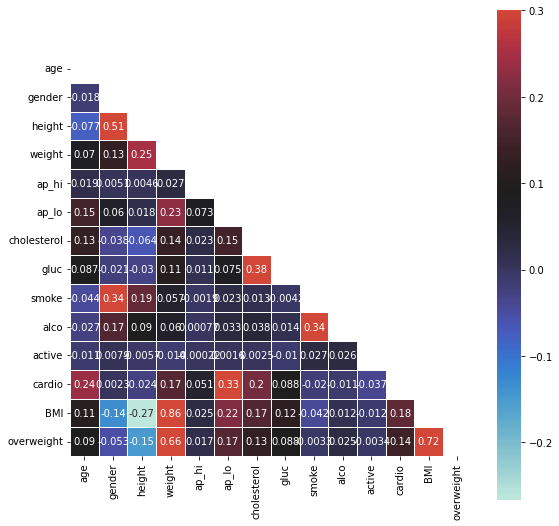

In [162]:
draw_heat_map()